In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
#DATA PREPROCESSING
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\pnuka\Desktop\Multiple_disease\Eye_diseases\archive (1)\dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4217 files belonging to 4 classes.


In [5]:
class_names = dataset.class_names
class_names

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

In [6]:
len(dataset)

132

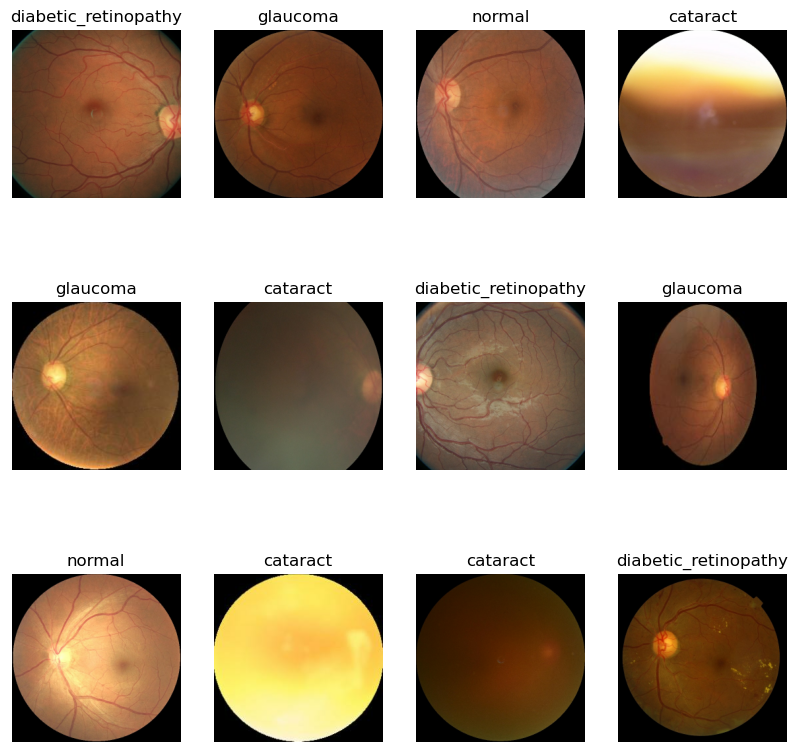

In [7]:
# VISUALIZATION
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    dataset_size = ds.cardinality().numpy()  # Correct way to get dataset size in TF
    if dataset_size == 0:
        raise ValueError("Dataset is empty! Check dataset loading.")

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=42)

    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)  # Ensures correct test dataset

    return train_ds, val_ds, test_ds

# Example usage
dataset = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\pnuka\Desktop\Multiple_disease\Eye_diseases\archive (1)\dataset", image_size=(224, 224), batch_size=32)
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


Found 4217 files belonging to 4 classes.


In [9]:
len(train_ds)

105

In [10]:
len(val_ds)

13

In [11]:
len(test_ds)

14

In [12]:
trains_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
## Recycling and resizing
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Example size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  
    layers.Rescaling(1.0/255)
])

In [14]:
## DATA AUGUMENTATION
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [15]:
## MODEL BUILDING
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation ='softmax'),
    
])
model.build(input_shape=input_shape)

C:\Users\pnuka\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,524 (670.02 KB)

 Trainable params: 171,524 (670.02 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.3241 - loss: 1.3408 - val_accuracy: 0.5288 - val_loss: 1.0950
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.5313 - loss: 1.0508 - val_accuracy: 0.5192 - val_loss: 0.9280
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5594 - loss: 0.9452 - val_accuracy: 0.6154 - val_loss: 0.8469
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 987ms/step - accuracy: 0.6230 - loss: 0.8439 - val_accuracy: 0.6250 - val_loss: 0.9321
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 136s 973ms/step - accuracy: 0.7013 - loss: 0.7273 - val_accuracy: 0.7091 - val_loss: 0.8733
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 115s 935ms/step - accuracy: 0.7251 - loss: 0.6783 - val_accuracy: 0.7572 - val_loss: 0.6210
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 111s 881ms/step - accuracy: 0.7629 - loss: 0.5699 - val_accuracy: 0.7668 - val_loss: 0.6232
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 99s 814ms/step - accuracy: 0.7979 - loss: 0.5

In [19]:
  ## MODEL EVALUTION
scores = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.8490 - loss: 0.3685


In [20]:
scores

[0.3359545171260834, 0.8683035969734192]

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 105}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
history.history['accuracy']

[0.39785265922546387,
 0.5329555869102478,
 0.581866979598999,
 0.6331643462181091,
 0.7166716456413269,
 0.7399343848228455,
 0.7637936472892761,
 0.7822844982147217,
 0.8019683957099915,
 0.7894423007965088,
 0.8133015036582947,
 0.817559540271759,
 0.8282135128974915,
 0.8338801264762878,
 0.8329854011535645,
 0.829704761505127,
 0.8377572298049927,
 0.8470026850700378,
 0.8455114960670471,
 0.8491071462631226,
 0.8473009467124939,
 0.8508797883987427,
 0.8577393293380737,
 0.8473214507102966,
 0.8574411273002625,
 0.8571428656578064,
 0.8634058833122253,
 0.8586340546607971,
 0.8622129559516907,
 0.8666865229606628,
 0.8669847846031189,
 0.8738095164299011,
 0.8657918572425842,
 0.867283046245575,
 0.8711309432983398,
 0.8660900592803955,
 0.8770833611488342,
 0.8729496002197266,
 0.8711601495742798,
 0.8750372529029846,
 0.8780196905136108,
 0.8726513385772705,
 0.87384432554245,
 0.8786161541938782,
 0.8810020685195923,
 0.8824933171272278,
 0.8851774334907532,
 0.883387982845306

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

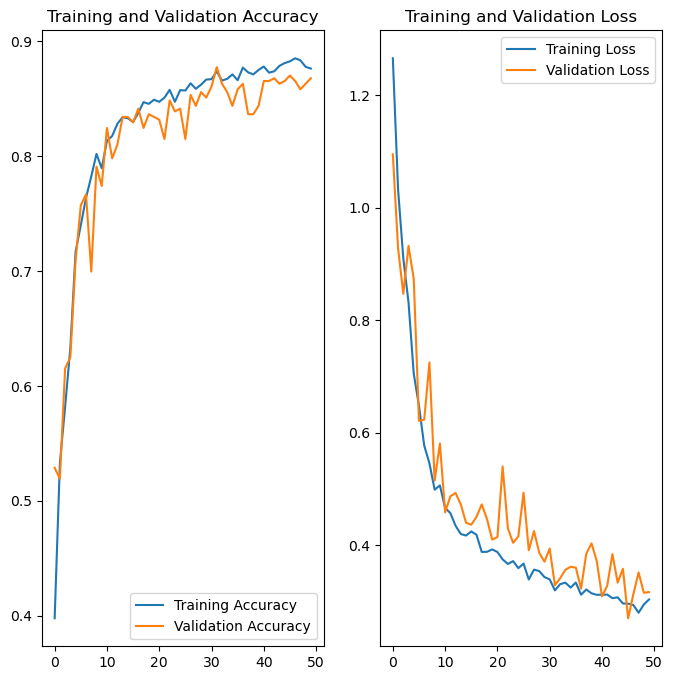

In [26]:
##ACCURACY AND LOSS VISUALIZATION
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: glaucoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
predicted label:  normal


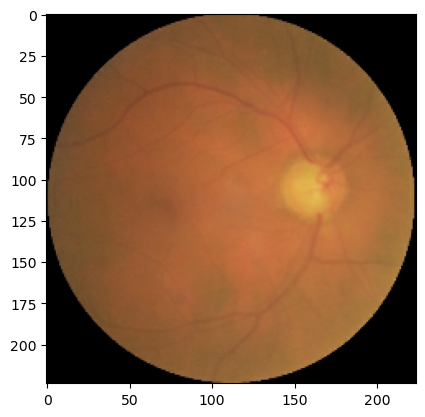

In [27]:
##MODEL PREDICTION
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image =images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [28]:
model.save('Eye_disease_model.keras')

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


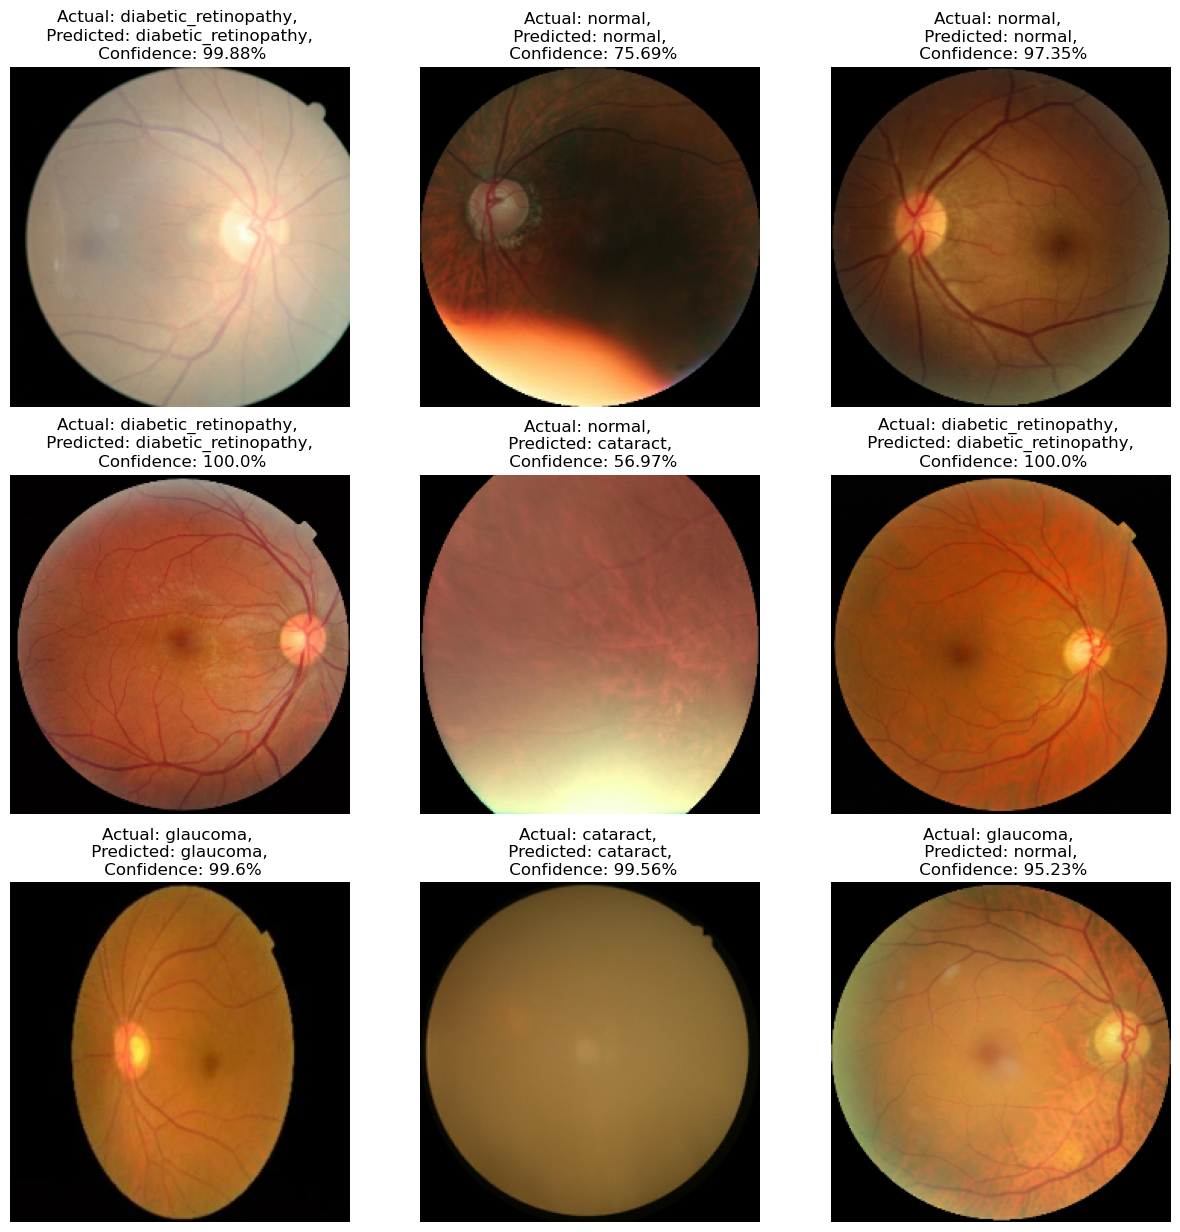

In [30]:
## MODEL PREDICTION
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        plt.axis("off")